In [1]:
import numpy as np
import pandas as pd                


In [2]:
df=pd.DataFrame()

In [3]:
df['X1']=[8,4,3,4,1,6,7,8,9,3]
df['X2']=[1,6,4,2,3,7,8,9,5,2]
df['label']=[1,0,0,0,0,1,1,1,1,0]

In [4]:
df

,X1,X2,label
0,8,1,1
1,4,6,0
2,3,4,0
3,4,2,0
4,1,3,0
5,6,7,1
6,7,8,1
7,8,9,1
8,9,5,1
9,3,2,0


In [5]:
df['weights']=1/len(df)

In [6]:
df

,X1,X2,label,weights
0,8,1,1,0.1
1,4,6,0,0.1
2,3,4,0,0.1
3,4,2,0,0.1
4,1,3,0,0.1
5,6,7,1,0.1
6,7,8,1,0.1
7,8,9,1,0.1
8,9,5,1,0.1
9,3,2,0,0.1


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt1=DecisionTreeClassifier(max_depth=1)

In [9]:
X=df.iloc[:,:2].values
y=df.iloc[:,2].values


In [10]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

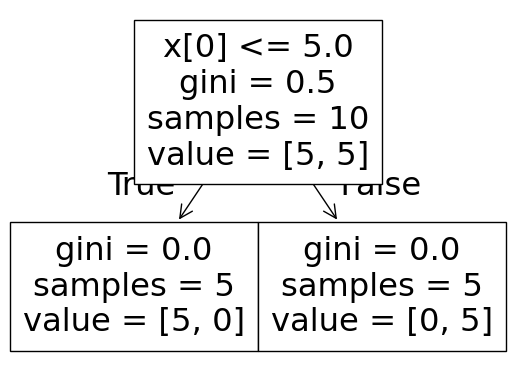

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

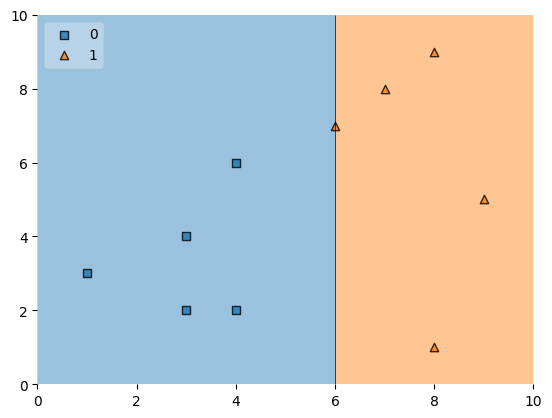

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=dt1, legend=2)